## 2.6 ポートフォリオ構築の基礎

### コード 2.26 2 銘柄の株価の関係性を分析する

           ticker  close    return
date                              
1991-01-04  A0001   1457 -0.884354
1991-01-04  F0109   2242 -0.355556
1991-01-04  J0077   2339  1.519097
1991-01-04  R0098  16122 -2.373744
1991-01-04  G0043   2541 -0.196386
...           ...    ...       ...
2014-12-30  H0035   4320 -0.575374
2014-12-30  X0096  16831  3.181707
2014-12-30  V0074   3535  5.901738
2014-12-30  V0028   4076  3.635901
2014-12-30  Z0137    647  2.535658

[12006004 rows x 3 columns]
r = 0.54


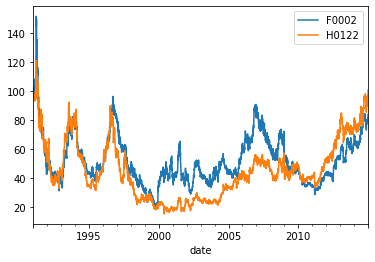

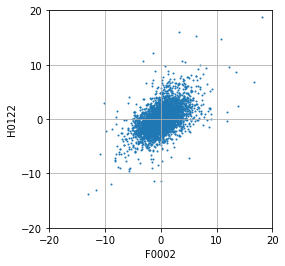

In [2]:
import pandas as pd

# 日次データの読み込みと選択
stockDaily = pd.read_csv('./data/stockDaily.csv', parse_dates=['date'])
stockDaily['date'] = stockDaily['date'].dt.to_period('D')
stockDaily = stockDaily.set_index('date').sort_index()
stockDaily = stockDaily.loc['1991-01':'2014-12', ['ticker', 'close', 'return']]
print(stockDaily)

# F0002とH0122についての初日を100としたときの終値の変動
close_x = stockDaily[stockDaily['ticker'] == 'F0002']['close']
close_y = stockDaily[stockDaily['ticker'] == 'H0122']['close']
stocks = pd.DataFrame({'F0002': close_x / close_x[0] * 100,
                       'H0122': close_y / close_y[0] * 100})
stocks.plot()

# F0002とH0122のリターンの散布図
return_x = stockDaily[stockDaily['ticker'] == 'F0002']['return']
return_y = stockDaily[stockDaily['ticker'] == 'H0122']['return']
corr = return_x.corr(return_y)
print('r = %.2f' % corr)  # 相関係数を表示
## r = 0.54
stocks = pd.DataFrame({'F0002': return_x, 'H0122': return_y})
# s=1は点のサイズ
# grid=Trueでグリッド状にメモリ補助線を描画する
# figsizeで描画サイズを指定する(インチ,100dpi)
ax = stocks.plot.scatter('F0002', 'H0122', xlim=(-20, 20), ylim=(-20, 20),
                         s=1, grid=True, figsize=(4, 4))
ax.set_yticks([-20, -10, 0, 10, 20])


### コード2.27 複数銘柄の全組み合わせで散布図を描画する

ticker     B0002     B0004     B0015     B0030
ticker                                        
B0002   1.000000  0.120526  0.111949  0.124865
B0004   0.120526  1.000000  0.434834  0.460028
B0015   0.111949  0.434834  1.000000  0.433123
B0030   0.124865  0.460028  0.433123  1.000000


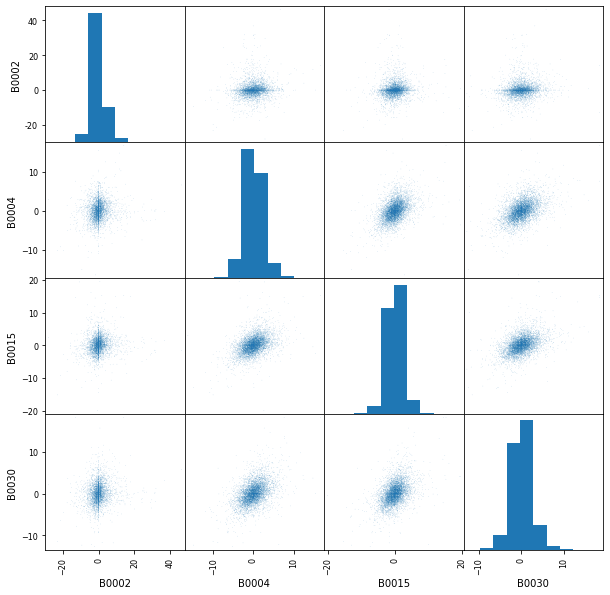

In [26]:
# 散布図行列: 選択した複数銘柄の全組み合わせで散布図を描画
targets = ['B0002', 'B0004', 'B0015', 'B0030']
tickers = stockDaily[stockDaily['ticker'].isin(targets)]  # tickerを選択
# 行をdate，列をticker，値をreturnとしたピボットテーブルの作成
cross = tickers.pivot(columns='ticker', values='return')
# 相関行列の計算/表示
corr = cross.corr()
print(corr)
## ticker     B0002     B0004     B0015     B0030
## ticker                                        
## B0002   1.000000  0.120526  0.111949  0.124865
## B0004   0.120526  1.000000  0.434834  0.460028
## B0015   0.111949  0.434834  1.000000  0.433123
## B0030   0.124865  0.460028  0.433123  1.000000
ax = pd.plotting.scatter_matrix(cross, s=1, figsize=(10, 10))


### コード2.7に加えて、相関係数を計算し表示させる方法

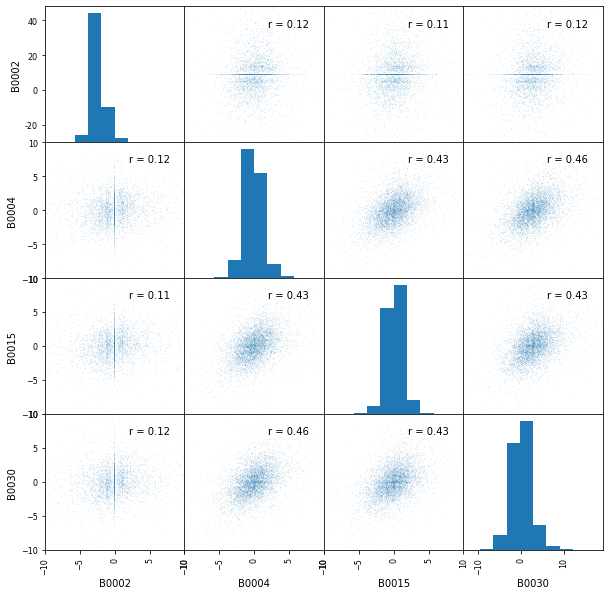

In [4]:
# ticker(列方向のデータ)の全組み合わせの散布図行列の作成
ax = pd.plotting.scatter_matrix(cross, s=1, figsize=(10, 10))

# axは5×5のndarrayで，それぞれにsubplotとしての散布図がセットされている。
# 以下では，その中の散布図のみ(対角成分以外)の設定を行うコードである。
for i in range(len(ax)):  # 散布図行列の行番号 0-5
    for j in range(len(ax)):  # 散布図行列の列番号 0-5
        if i == j:  # 対角成分の時はスキップ
            continue
        # 散布図のx,y座標の上限下限を変更する
        ax[i, j].set_xlim(-10, 10)
        ax[i, j].set_ylim(-10, 10)
        # 散布図の座標 (x, y)=(2, 7)に相関係数を表示する
        ax[i, j].text(2, 7, 'r = %.2f' % corr.iloc[i, j])